## Task 4 - Default estimator and WoE binning 
The purpose of any credit scoring system is to classify users as high risk or low-risk. High-risk groups are those with high likelihood of default - those who do not pay the loan principal and interest in the specified time frame. 

To simplify the process, here we want to construct a variable based on RFMS formalism that classifies users into good (high RFMS score) and bad (low RFMS score). You may use this reference to help you connect the dots.
Construct a default estimator (proxy)
By visualizing all transactions in the RFMS space, establish a boundary where users are classified as high and low RFMS scores.
Assign all users the good and bad label
Perform Weight of Evidence (WoE) binning following this,  this  or this references


In [24]:
from sklearn.model_selection import train_test_split
from load import load_data
from Default_estimator_and_WoE_binning import univarate
from monotonic_binning.monotonic_woe_binning import Binning
from feature_engineering import encode

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc



In [25]:
df=load_data(r"C:\Users\ASUS VIVO\Desktop\Week_6\data (2).csv")

In [26]:
df['ProductCategory']=df['ProductCategory'].apply(encode)

array([[<Axes: title={'center': 'CountryCode'}>,
        <Axes: title={'center': 'ProductCategory'}>],
       [<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Value'}>],
       [<Axes: title={'center': 'PricingStrategy'}>,
        <Axes: title={'center': 'FraudResult'}>]], dtype=object)

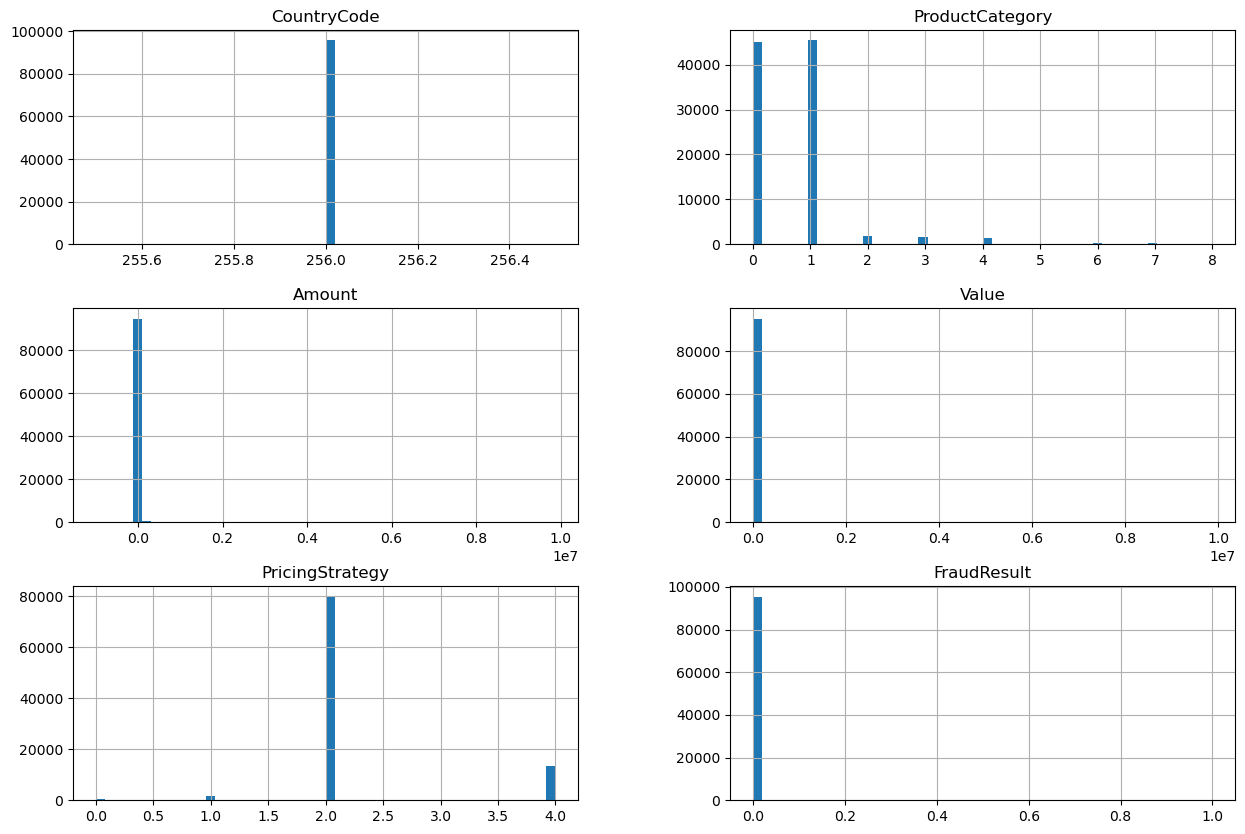

In [27]:
univarate(df)

Train test split

In [28]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,0,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,1,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,0,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,2,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,1,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,1,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,0,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,1,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,4,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [29]:
train, test = sc.split_df(df, 'FraudResult', ratio = 0.8, seed = 999).values()

In [30]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,0,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,1,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,2,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,1,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,0,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0


In [31]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,0,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
22,TransactionId_138139,BatchId_8334,AccountId_4841,SubscriptionId_3829,CustomerId_3507,UGX,256,ProviderId_4,ProductId_6,1,ChannelId_2,-25.0,25,2018-11-15T04:59:41Z,2,0
27,TransactionId_126754,BatchId_60208,AccountId_1616,SubscriptionId_4410,CustomerId_1995,UGX,256,ProviderId_6,ProductId_19,4,ChannelId_3,3500.0,3500,2018-11-15T05:38:25Z,2,0
28,TransactionId_136360,BatchId_48611,AccountId_4841,SubscriptionId_3829,CustomerId_1995,UGX,256,ProviderId_4,ProductId_6,1,ChannelId_2,-70.0,70,2018-11-15T05:38:35Z,2,0
29,TransactionId_89705,BatchId_16332,AccountId_3455,SubscriptionId_946,CustomerId_3890,UGX,256,ProviderId_5,ProductId_15,1,ChannelId_3,2000.0,2000,2018-11-15T05:38:37Z,2,0


In [32]:
y=df['FraudResult']
columns_to_drop = df.select_dtypes(include=['object']).columns.tolist() + ['FraudResult']+['CountryCode']
x = df.drop(columns=columns_to_drop)

In [33]:
x

,ProductCategory,Amount,Value,PricingStrategy
0,0,1000.0,1000,2
1,1,-20.0,20,2
2,0,500.0,500,2
3,2,20000.0,21800,2
4,1,-644.0,644,2
...,...,...,...,...
95657,1,-1000.0,1000,2
95658,0,1000.0,1000,2
95659,1,-20.0,20,2
95660,4,3000.0,3000,2


In [34]:
y

0        0
1        0
2        0
3        0
4        0
        ..
95657    0
95658    0
95659    0
95660    0
95661    0
Name: FraudResult, Length: 95662, dtype: int64

In [35]:
x_columns=x.columns

def woe(x, y):
    train, test = sc.split_df(df, 'FraudResult', ratio = 0.8, seed = 999).values()
    bin_object = Binning(y, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    global breaks
    breaks = {}
    for i in x:
     bin_object.fit(train[[y, i]])
     breaks[i] = (bin_object.bins[1:-1].tolist())
    return breaks
woe(x_columns, 'FraudResult')

{'ProductCategory': [0.0, 8.0],
 'Amount': [490000.0, 9880000.0],
 'Value': [490000.0, 9880000.0],
 'PricingStrategy': [4.0]}

In [45]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,0,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,1,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,0,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,2,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,1,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,1,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,0,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,1,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,4,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [52]:

rfms = df.groupby('CustomerId').agg(
    Frequency=('TransactionStartTime', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()

print(rfms)

           CustomerId  Frequency  Monetary
0        CustomerId_1          1  -10000.0
1       CustomerId_10          1  -10000.0
2     CustomerId_1001          5   20000.0
3     CustomerId_1002         11    4225.0
4     CustomerId_1003          6   20000.0
...               ...        ...       ...
3737   CustomerId_992          6   20000.0
3738   CustomerId_993          5   20000.0
3739   CustomerId_994        101  543873.0
3740   CustomerId_996         17  139000.0
3741   CustomerId_998         22  100000.0

[3742 rows x 3 columns]


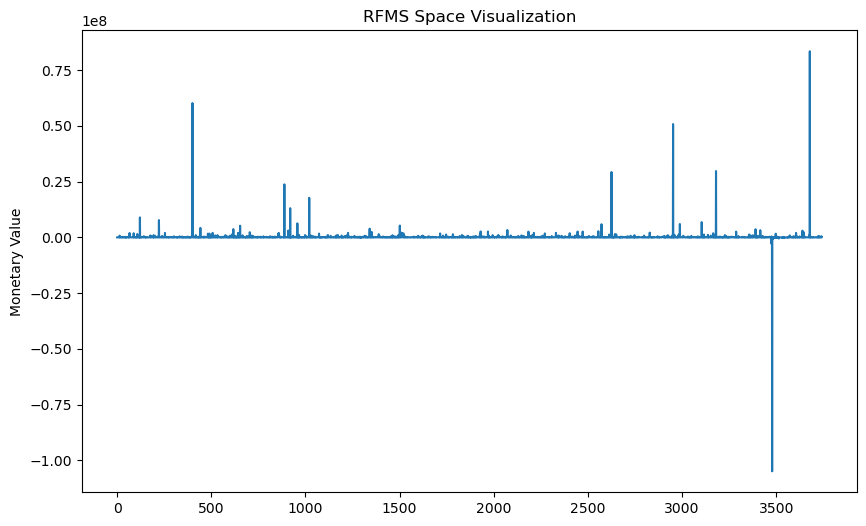

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(rfms['Monetary'])
plt.ylabel('Monetary Value')
plt.title('RFMS Space Visualization')
plt.show()